# Eindopdracht Traineeship RSG

## Data impact met Python

### Introduction
Op dit moment analyseert Synthon vooral veel financiële data. Doel is om dit de komende tijd steeds verder uit te breiden met non-financiële data: startende met HR data. Met HR data wordt data bedoeld die gekoppeld is aan FTE’s (FTE = Full Time Equivalent). Synthon is bezig met het overgaan en het uitbreiden van het pakket binnen het software programma IBM. Door het analyseren van HR data zullen er nieuwe inzichten binnen Synthon komen. Voor de huidige situatie kunnen er cijfers in kaart worden gebracht wat betreft bijv. man/vrouw verhouding en salarissen binnen afdelingen. In de toekomst kunnen er patronen onderzocht worden in bijv. ziekteverzuim en de totale samenstelling binnen afdelingen. In eerste instantie alleen voor Synthon Nederland maar uiteindelijk voor Synthon wereldwijd. Synthon kan met deze inzichten een duidelijk beeld krijgen van de werkomgeving en rekening houden met het plannen van projecten en processen en een betere capaciteitsinschatting maken.

### Business vraag
Welke conclusies kunnen er getrokken worden uit de beschikbare HR data?\
• Notitie: Vraag is of ik verzuim data op tijd ga krijgen. Onderzoek gaat op dit moment alleen over Synthon Nederland.\
  -> 18 mei nog steeds geen verzuimdata\
• Huidig idee: Kijk per afdeling

### Stakeholders
Intern: C-level management, HR. \
• Stel verzuimdata: Ook werknemers die met plannen van mensen bezig zijn, ook Synthon als bedrijf ivm omzet.

### Data
HR-data:\
• Werknemer\
• Contractvorm\
• Leeftijd\
• Salaris\
• Afdeling\
• Verzuim\
• Geslacht\
• Nationaliteit\
Notitie: De data is confidentieel en kan niet gedeeld worden met derden.

### Doel
#### Hoofddoel:
Het inzichtelijk maken van haar HR dataset door middel van Dashboards die C-level management / HR kunnen ondersteunen in het maken van keuzes.

#### Subdoelen:
Data klaarstomen in Python.\
Dashboard bouwen in IBM Planning & Analytics.\
(Connectie bouwen automatische import data Visma (HR-syteem) en IBM Planning & Analytics)

## De Opdracht

#### Loading Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as math

#### Import Data

In [2]:
HR_Data_Bron = pd.read_excel('data/HR_Data_(bron).xlsx')

In [3]:
HR_Data_Bron = HR_Data_Bron.drop(['BSN','Achternaam'],axis=1) #delete kolommen die naar persoon wijzen ivm privacy

In [4]:
HR_Data_Bron

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie
0,1994-06-01,NaT,V,Nederlandse,NaN,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C
1,1994-11-01,NaT,M,Nederlandse,EINDHOVEN,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D
2,1995-01-01,NaT,V,Nederlandse,NaN,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C
3,1995-02-01,NaT,M,Nederlandse,NaN,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C
4,1995-09-01,NaT,M,Nederlandse,Arnhem,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board
188,2020-02-10,2020-06-28,V,Nederlandse,NaN,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,NaN,Intern
189,2020-03-01,2021-02-28,M,Nederlandse,Amsterdam,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A
190,2019-11-25,2020-11-25,V,Nederlandse,NaN,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,NaN,Assistant-B


In [5]:
Data_Cost_Center = pd.read_excel('data/Data_Cost_Center.xlsx')
Data_Cost_Center

,Cost center,Afdeling
0,3203040,Account Management
1,3201021,Analytical Operation
2,3201050,API Procurement
3,3203080,Business Development
4,3202150,Clinical Research & Development
5,3205010,Corporate Application Services
6,3205010,Corporate Application Services 2
7,3204010,Corporate Communications
8,3204041,Corporate Controlling & Accounting
9,3205010,Corporate Infrastructure Services


In [6]:
HR_Data = pd.merge(HR_Data_Bron, Data_Cost_Center, how='left', on='Afdeling')
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
0,1994-06-01,NaT,V,Nederlandse,NaN,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020.0
1,1994-11-01,NaT,M,Nederlandse,EINDHOVEN,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060.0
2,1995-01-01,NaT,V,Nederlandse,NaN,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050.0
3,1995-02-01,NaT,M,Nederlandse,NaN,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010.0
4,1995-09-01,NaT,M,Nederlandse,Arnhem,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,NaN
196,2020-02-10,2020-06-28,V,Nederlandse,NaN,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,NaN,Intern,3204030.0
197,2020-03-01,2021-02-28,M,Nederlandse,Amsterdam,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011.0
198,2019-11-25,2020-11-25,V,Nederlandse,NaN,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,NaN,Assistant-B,3201050.0


In [7]:
len(HR_Data)-len(HR_Data_Bron)

8

De lengte van de HR_Data is gestegen i.v.m. de bron data. Hoe kan dit? Aan de afdelingen Quality & Drug Safety en Information Services zijn 2 Cost centers gekoppeld, omdat de VP's in deze afdelingen een ander Cost center hebben. we deleten nu van de werknemers in de afdelingen Quality & Drug Safety en Information Services de rijen met de Cost centers van de VP's in de HR_Data en passen de data voor de correspondere VP's aan. Zie onderstaand voorbeeld van dubbele rijen met verschillende cost centers

In [8]:
HR_Data[HR_Data.Afdeling == 'Information Services']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
22,1999-12-01,NaT,V,Nederlandse,NaN,79,1969-10-22,50,Onbepaalde duur,12.0,0.7,4040.0,109.16,Information Services,NaN,Assistant-B,3205010.0
23,1999-12-01,NaT,V,Nederlandse,NaN,79,1969-10-22,50,Onbepaalde duur,12.0,0.7,4040.0,109.16,Information Services,NaN,Assistant-B,3205011.0
124,2015-09-01,NaT,M,Nederlandse,Harderwijk,945,1972-07-21,47,Onbepaalde duur,15.0,0.8,5387.0,104.08,Information Services,Officer,Officer-C,3205010.0
125,2015-09-01,NaT,M,Nederlandse,Harderwijk,945,1972-07-21,47,Onbepaalde duur,15.0,0.8,5387.0,104.08,Information Services,Officer,Officer-C,3205011.0
126,2015-09-01,NaT,M,Nederlandse,Venlo,946,1961-08-13,58,Onbepaalde duur,15.0,1.0,5587.0,107.94,Information Services,Officer,Officer-C,3205010.0
127,2015-09-01,NaT,M,Nederlandse,Venlo,946,1961-08-13,58,Onbepaalde duur,15.0,1.0,5587.0,107.94,Information Services,Officer,Officer-C,3205011.0
180,2001-09-01,NaT,M,Nederlandse,NaN,1309,1967-03-02,53,Onbepaalde duur,20.0,1.0,18356.0,90.00,Information Services,Vice President,Vice President,3205010.0
181,2001-09-01,NaT,M,Nederlandse,NaN,1309,1967-03-02,53,Onbepaalde duur,20.0,1.0,18356.0,90.00,Information Services,Vice President,Vice President,3205011.0


In [9]:
# Voor Information Services
HR_Data = HR_Data[HR_Data['Cost center'] != 3205011]
HR_Data.loc[(HR_Data.Afdeling == 'Information Services') & (HR_Data.Functie == 'Vice President'),'Cost center'] = 3205011
HR_Data[HR_Data.Afdeling == 'Information Services']


C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
22,1999-12-01,NaT,V,Nederlandse,NaN,79,1969-10-22,50,Onbepaalde duur,12.0,0.7,4040.0,109.16,Information Services,NaN,Assistant-B,3205010.0
124,2015-09-01,NaT,M,Nederlandse,Harderwijk,945,1972-07-21,47,Onbepaalde duur,15.0,0.8,5387.0,104.08,Information Services,Officer,Officer-C,3205010.0
126,2015-09-01,NaT,M,Nederlandse,Venlo,946,1961-08-13,58,Onbepaalde duur,15.0,1.0,5587.0,107.94,Information Services,Officer,Officer-C,3205010.0
180,2001-09-01,NaT,M,Nederlandse,NaN,1309,1967-03-02,53,Onbepaalde duur,20.0,1.0,18356.0,90.00,Information Services,Vice President,Vice President,3205011.0


Nu voor department Quality & Drug Safety.

In [10]:
HR_Data[HR_Data.Afdeling == 'Quality & Drug Safety']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center


Geen data gevonden? Kan niet! In bron data staan er twee spaties na &-teken.

In [11]:
HR_Data.Afdeling = HR_Data.Afdeling.replace('\s+', ' ', regex=True)


C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
HR_Data[HR_Data.Afdeling == 'Quality & Drug Safety']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
18,1999-08-01,NaT,V,Nederlandse,NaN,73,1977-09-07,42,Onbepaalde duur,17.0,0.8,6837.0,98.89,Quality & Drug Safety,Project Leader,Project Leader-C,3201081.0
19,1999-08-01,NaT,V,Nederlandse,NaN,73,1977-09-07,42,Onbepaalde duur,17.0,0.8,6837.0,98.89,Quality & Drug Safety,Project Leader,Project Leader-C,3202021.0
34,2002-07-01,NaT,M,Nederlandse,NaN,134,1967-09-27,52,Onbepaalde duur,17.0,1.0,7227.0,104.53,Quality & Drug Safety,Project Leader,Project Leader-C,3201081.0
35,2002-07-01,NaT,M,Nederlandse,NaN,134,1967-09-27,52,Onbepaalde duur,17.0,1.0,7227.0,104.53,Quality & Drug Safety,Project Leader,Project Leader-C,3202021.0
141,2016-11-01,NaT,M,Syrische,"Aleppo, Syria",1049,1983-09-15,36,Onbepaalde duur,14.0,1.0,3765.0,83.19,Quality & Drug Safety,Officer,Officer-B,3201081.0
142,2016-11-01,NaT,M,Syrische,"Aleppo, Syria",1049,1983-09-15,36,Onbepaalde duur,14.0,1.0,3765.0,83.19,Quality & Drug Safety,Officer,Officer-B,3202021.0
177,1999-05-01,NaT,M,Nederlandse,NaN,1307,1962-11-06,57,Onbepaalde duur,20.0,1.0,17915.0,90.00,Quality & Drug Safety,Vice President,Vice President,3201081.0
178,1999-05-01,NaT,M,Nederlandse,NaN,1307,1962-11-06,57,Onbepaalde duur,20.0,1.0,17915.0,90.00,Quality & Drug Safety,Vice President,Vice President,3202021.0


Nu vinden we wel waardes voor de department Quality & Drug Safety. Het kan zijn dat er meer dubbele spaties in de bron data stonden. Laten we later checken of er NaN blijven staan in de kolom Afdeling. Nu eerst gaan we door met Quality & Drug Safety

In [13]:
HR_Data = HR_Data[HR_Data['Cost center'] != 3201081]
HR_Data.loc[(HR_Data.Afdeling == 'Quality & Drug Safety') & (HR_Data.Functie == 'Vice President'),'Cost center'] = 3201081
HR_Data[HR_Data.Afdeling == 'Quality & Drug Safety']


,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
19,1999-08-01,NaT,V,Nederlandse,NaN,73,1977-09-07,42,Onbepaalde duur,17.0,0.8,6837.0,98.89,Quality & Drug Safety,Project Leader,Project Leader-C,3202021.0
35,2002-07-01,NaT,M,Nederlandse,NaN,134,1967-09-27,52,Onbepaalde duur,17.0,1.0,7227.0,104.53,Quality & Drug Safety,Project Leader,Project Leader-C,3202021.0
142,2016-11-01,NaT,M,Syrische,"Aleppo, Syria",1049,1983-09-15,36,Onbepaalde duur,14.0,1.0,3765.0,83.19,Quality & Drug Safety,Officer,Officer-B,3202021.0
178,1999-05-01,NaT,M,Nederlandse,NaN,1307,1962-11-06,57,Onbepaalde duur,20.0,1.0,17915.0,90.00,Quality & Drug Safety,Vice President,Vice President,3201081.0


In [14]:
HR_Data['Cost center']

0      3203020.0
1      3204060.0
2      3201050.0
3      3205010.0
4      3205010.0
         ...    
195          NaN
196    3204030.0
197    3203011.0
198    3201050.0
199    3203040.0
Name: Cost center, Length: 192, dtype: float64

Hebben we nog meer NaN?

In [15]:
HR_Data['Cost center'].isna().sum()

3

Ja, dit zijn de Board members. De Board members zitten in een andere company en hebben daarom een ander cost center. Niet beginnend met 320, maar met 150.

In [16]:
HR_Data[HR_Data['Cost center'].isna()]

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
191,1997-09-01,NaT,M,Nederlandse,Meppel,1346,1968-05-02,51,Onbepaalde duur,20.0,1.0,21419.0,90.0,Research & Development,Chief x Officer,Board,NaN
193,2004-07-01,NaT,M,Nederlandse,NaN,1348,1959-01-05,61,Onbepaalde duur,20.0,1.0,26420.0,90.0,Operations,Chief x Officer,Board,NaN
195,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.0,30212.0,90.0,Stamina BidCo BV,Chief x Officer,Board,NaN


Deze zullen gevuld moeten worden met cost center 1504050. Let op: Board members kunnen ook in een bepaalde afdeling zitten als manager en zullen dus niet de cost center moeten krijgen beginnende met 320 maar met 150. Is dit het geval?

In [17]:
HR_Data[HR_Data['Functie']=='Board']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
182,2019-11-01,NaT,M,Nederlandse,NaN,1316,1955-01-28,65,Onbepaalde duur,20.0,1.0,11000.0,90.0,Marketing & Sales Emerging Markets,Chief x Officer,Board,3203050.0
191,1997-09-01,NaT,M,Nederlandse,Meppel,1346,1968-05-02,51,Onbepaalde duur,20.0,1.0,21419.0,90.0,Research & Development,Chief x Officer,Board,NaN
192,2003-09-15,NaT,M,Nederlandse,NaN,1347,1971-09-05,48,Onbepaalde duur,20.0,1.0,24153.0,90.0,Corporate Controlling & Accounting,Chief x Officer,Board,3204041.0
193,2004-07-01,NaT,M,Nederlandse,NaN,1348,1959-01-05,61,Onbepaalde duur,20.0,1.0,26420.0,90.0,Operations,Chief x Officer,Board,NaN
194,2008-09-01,NaT,M,Nederlandse,NIJMEGEN,1349,1969-08-16,50,Onbepaalde duur,20.0,1.0,24846.0,90.0,Marketing & Sales,Chief x Officer,Board,3203110.0
195,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.0,30212.0,90.0,Stamina BidCo BV,Chief x Officer,Board,NaN


Dit is het geval! Cost center cellen van alle Board members vervangen met 1504050.

In [18]:
HR_Data.loc[(HR_Data.Functie == 'Board'),'Cost center']=1504050 #Board has different cost center because in other company but has same department name
HR_Data = HR_Data.astype({"Cost center": int})
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
0,1994-06-01,NaT,V,Nederlandse,NaN,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020
1,1994-11-01,NaT,M,Nederlandse,EINDHOVEN,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060
2,1995-01-01,NaT,V,Nederlandse,NaN,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050
3,1995-02-01,NaT,M,Nederlandse,NaN,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010
4,1995-09-01,NaT,M,Nederlandse,Arnhem,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,1504050
196,2020-02-10,2020-06-28,V,Nederlandse,NaN,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,NaN,Intern,3204030
197,2020-03-01,2021-02-28,M,Nederlandse,Amsterdam,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011
198,2019-11-25,2020-11-25,V,Nederlandse,NaN,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,NaN,Assistant-B,3201050


Check: Geen NaN meer in kolom Cost Center?

In [19]:
HR_Data['Cost center'].isna().sum()

0

Check: Aantal rijen in HR_Data gelijk gebleven met Bron data

In [20]:
len(HR_Data)-len(HR_Data_Bron)

0

In [21]:
Data_Hoofdafdeling = pd.read_excel('data/Data_Hoofdafdeling.xlsx')
Data_Hoofdafdeling

,Mapping,Cost center
0,G&A,1504050
1,G&A,3204010
2,G&A,3204020
3,G&A,3204030
4,G&A,3204040
5,G&A,3204041
6,G&A,3204060
7,M&S,3203010
8,M&S,3203011
9,M&S,3203020


In [22]:
HR_Data = pd.merge(HR_Data, Data_Hoofdafdeling, how='left', on='Cost center') 
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Mapping
0,1994-06-01,NaT,V,Nederlandse,NaN,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020,M&S
1,1994-11-01,NaT,M,Nederlandse,EINDHOVEN,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060,G&A
2,1995-01-01,NaT,V,Nederlandse,NaN,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050,Shared Services
3,1995-02-01,NaT,M,Nederlandse,NaN,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010,Shared Services
4,1995-09-01,NaT,M,Nederlandse,Arnhem,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010,Shared Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,1504050,G&A
188,2020-02-10,2020-06-28,V,Nederlandse,NaN,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,NaN,Intern,3204030,G&A
189,2020-03-01,2021-02-28,M,Nederlandse,Amsterdam,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011,M&S
190,2019-11-25,2020-11-25,V,Nederlandse,NaN,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,NaN,Assistant-B,3201050,Shared Services


In [23]:
HR_Data = HR_Data.rename(columns={'Mapping': 'Hoofdafdeling'}) #rename column mapping in Hoofdafdeling
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling
0,1994-06-01,NaT,V,Nederlandse,NaN,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020,M&S
1,1994-11-01,NaT,M,Nederlandse,EINDHOVEN,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060,G&A
2,1995-01-01,NaT,V,Nederlandse,NaN,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050,Shared Services
3,1995-02-01,NaT,M,Nederlandse,NaN,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010,Shared Services
4,1995-09-01,NaT,M,Nederlandse,Arnhem,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010,Shared Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,1504050,G&A
188,2020-02-10,2020-06-28,V,Nederlandse,NaN,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,NaN,Intern,3204030,G&A
189,2020-03-01,2021-02-28,M,Nederlandse,Amsterdam,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011,M&S
190,2019-11-25,2020-11-25,V,Nederlandse,NaN,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,NaN,Assistant-B,3201050,Shared Services


In [24]:
HR_Data.Hoofdafdeling.isna().sum()

0

Dus Data voor Hoofdafdeling is correct ingelezen voor elke cell.

#### Exploring Data

In [25]:
HR_Data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 18 columns):
Datum in dienst        192 non-null datetime64[ns]
Datum uit dienst       15 non-null datetime64[ns]
Geslacht               192 non-null object
Nationaliteit          192 non-null object
Geboorteplaats         114 non-null object
Werknemernummer        192 non-null int64
Geboortedatum          192 non-null datetime64[ns]
Leeftijd               192 non-null int64
Arbeidscontract        192 non-null object
Cats. Salarisschaal    187 non-null float64
Deeltijdfactor         192 non-null float64
Salaris (100%)         192 non-null float64
RSP-factor             187 non-null float64
Afdeling               192 non-null object
Functiefamilie         162 non-null object
Functie                192 non-null object
Cost center            192 non-null int32
Hoofdafdeling          192 non-null object
dtypes: datetime64[ns](3), float64(4), int32(1), int64(2), object(8)
memory usage: 27.8+ KB


Notitie: 192 werknemers: Datum uit Dienst alleen wanneer tijdelijk contract aanwezig is

In [26]:
HR_Data_Bron.isnull().sum() #missing values

Datum in dienst          0
Datum uit dienst       177
Geslacht                 0
Nationaliteit            0
Geboorteplaats          78
Werknemernummer          0
Geboortedatum            0
Leeftijd                 0
Arbeidscontract          0
Cats. Salarisschaal      5
Deeltijdfactor           0
Salaris (100%)           0
RSP-factor               5
Afdeling                 0
Functiefamilie          30
Functie                  0
dtype: int64

Geboorteplaats niet interessant voor analyse. Ook inrealistisch om te voorspellen. Dus drop.

In [27]:
HR_Data=HR_Data.drop('Geboorteplaats', axis=1)

De kolom Functiefamilie is voor 30 uit 192 werknemers niet applicable. Deze wordt vaak afgeleid van de functienaam. Zie onderstaand.

In [28]:
HR_Data[HR_Data.Functiefamilie.isna()==False][['Functiefamilie','Functie']].head(5)

,Functiefamilie,Functie
0,Officer,Officer-C
1,Project Leader,Project Leader-D
2,Project Leader,Project Leader-C
3,Officer,Officer-C
4,Project Leader,Project Leader-B


In [29]:
HR_Data[HR_Data.Functiefamilie.isna()]

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling
21,1999-12-01,NaT,V,Nederlandse,79,1969-10-22,50,Onbepaalde duur,12.0,0.7,4040.00,109.16,Information Services,NaN,Assistant-B,3205010,Shared Services
39,2003-03-15,NaT,V,Nederlandse,176,1971-03-16,49,Onbepaalde duur,11.0,0.6,3735.00,111.43,Safety Data Analysis,NaN,Assistant-A,3203100,M&S
41,2003-08-11,NaT,V,Nederlandse,196,1977-04-29,42,Onbepaalde duur,15.0,0.8,5470.00,105.68,RA Support,NaN,Team Leader-C,3203010,M&S
49,2005-04-01,NaT,V,Nederlandse,271,1977-06-16,42,Onbepaalde duur,12.0,0.6,3466.00,93.65,Account Management,NaN,Assistant-B,3203040,M&S
50,2005-07-01,NaT,M,Nederlandse,277,1962-06-23,57,Onbepaalde duur,15.0,1.0,5857.00,113.16,Corporate Infrastructure Services,NaN,Engineer-C,3205010,Shared Services
55,2007-11-01,NaT,V,Nederlandse,375,1966-05-15,53,Onbepaalde duur,13.0,0.8,3975.00,98.05,Safety Compliance,NaN,Assistant-C,3203100,M&S
57,2008-03-01,NaT,M,Nederlandse,397,1975-04-12,45,Onbepaalde duur,15.0,1.0,5698.00,110.09,Corporate Infrastructure Services,NaN,Engineer-C,3205010,Shared Services
60,2008-05-01,NaT,V,Burger van de Bondsrepubliek Duitsland,411,1980-08-18,39,Onbepaalde duur,13.0,1.0,3933.00,97.02,Corporate Quality Compliance,NaN,Assistant-C,3203020,M&S
70,2009-12-17,NaT,M,Nederlandse,518,1987-10-24,32,Onbepaalde duur,13.0,1.0,3885.00,95.83,Corporate Infrastructure Services,NaN,Engineer-A,3205010,Shared Services
96,2012-08-01,NaT,M,Nederlandse,738,1964-02-26,56,Onbepaalde duur,13.0,0.9,4047.00,99.83,Safety Data Analysis,NaN,Assistant-C,3203100,M&S


In [30]:
for i in range(len(HR_Data)):
    if HR_Data.Functiefamilie.isna()[i]==True:
       HR_Data.Functiefamilie[i]=HR_Data['Functie'].str.split('-',n=1,expand=True)[0][i]


C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
HR_Data.Functiefamilie.isna().sum()


0

Dus alle waardes voor Functiefamilie zijn ingevuld.

In [32]:
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling
0,1994-06-01,NaT,V,Nederlandse,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020,M&S
1,1994-11-01,NaT,M,Nederlandse,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060,G&A
2,1995-01-01,NaT,V,Nederlandse,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050,Shared Services
3,1995-02-01,NaT,M,Nederlandse,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010,Shared Services
4,1995-09-01,NaT,M,Nederlandse,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010,Shared Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-11-01,NaT,M,Nederlandse,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,1504050,G&A
188,2020-02-10,2020-06-28,V,Nederlandse,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,Intern,Intern,3204030,G&A
189,2020-03-01,2021-02-28,M,Nederlandse,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011,M&S
190,2019-11-25,2020-11-25,V,Nederlandse,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,Assistant,Assistant-B,3201050,Shared Services


In .info() zie je dat Cats.Salarisschaal en RSP-factor beiden 5x NaN zijn. Waarschijnlijk zijn deze in beide gevallen tegelijk NaN. Let's check. En waarom is dit het geval?

In [33]:
HR_Data[HR_Data['Cats. Salarisschaal'].isna()]

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling
165,2019-08-05,NaT,V,Nederlandse,1279,1998-09-16,21,Uitzendcontract,NaN,0.4,0.00,NaN,Account Management,Assistant,Assistant,3203040,M&S
175,2019-11-11,2020-04-30,V,Nederlandse,1319,1998-09-16,21,Stagiair(e),NaN,0.6,666.67,NaN,Account Management,Intern,Intern,3203040,M&S
188,2020-02-10,2020-06-28,V,Nederlandse,1351,1997-06-02,22,Stagiair(e),NaN,1.0,400.00,NaN,Human Resources,Intern,Intern,3204030,G&A
190,2019-11-25,2020-11-25,V,Nederlandse,1353,1982-03-26,38,Uitzendcontract,NaN,1.0,0.00,NaN,API Procurement,Assistant,Assistant-B,3201050,Shared Services
191,2020-01-01,2020-12-31,V,Nederlandse,1354,1995-05-05,24,Uitzendcontract,NaN,1.0,0.00,NaN,Account Management,Specialist,Specialist,3203040,M&S


Ja, als de Cats. Salarisschaal not applicable is, is RSP-factor ook not applicable. Dit geldt alleen voor Arbeidscontract Stagiair(e) en Uitzendkracht. Vast bedrag, niet ingedeeld in schaal. Laat ik zo.

#### Analyse

In [35]:
HR_Data.groupby(['Geslacht']).mean()

,Werknemernummer,Leeftijd,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Cost center
Geslacht,,,,,,,
M,711.230769,47.000000,16.571429,0.962637,8074.197802,99.473077,3.091195e+06
V,692.831683,42.356436,15.500000,0.859406,5439.085842,95.414583,3.202754e+06


Werknemernummer is niet interessant voor Mean,
Leeftijd wel. Gemiddelde leeftijd mannen en vrouwen 5 jaar verschil.
Vrouwen hebben lagere salarisschaal en werken meer deeltijd en verdienen gemiddeld 2500 euro per maand minder ook al werken ze full time.
Cost center niet interessant.
Zulke dingen ook interessant om te vergelijken per afdeling, per functiefamilie, per leeftijd etc. met behulp van grafiek.

C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


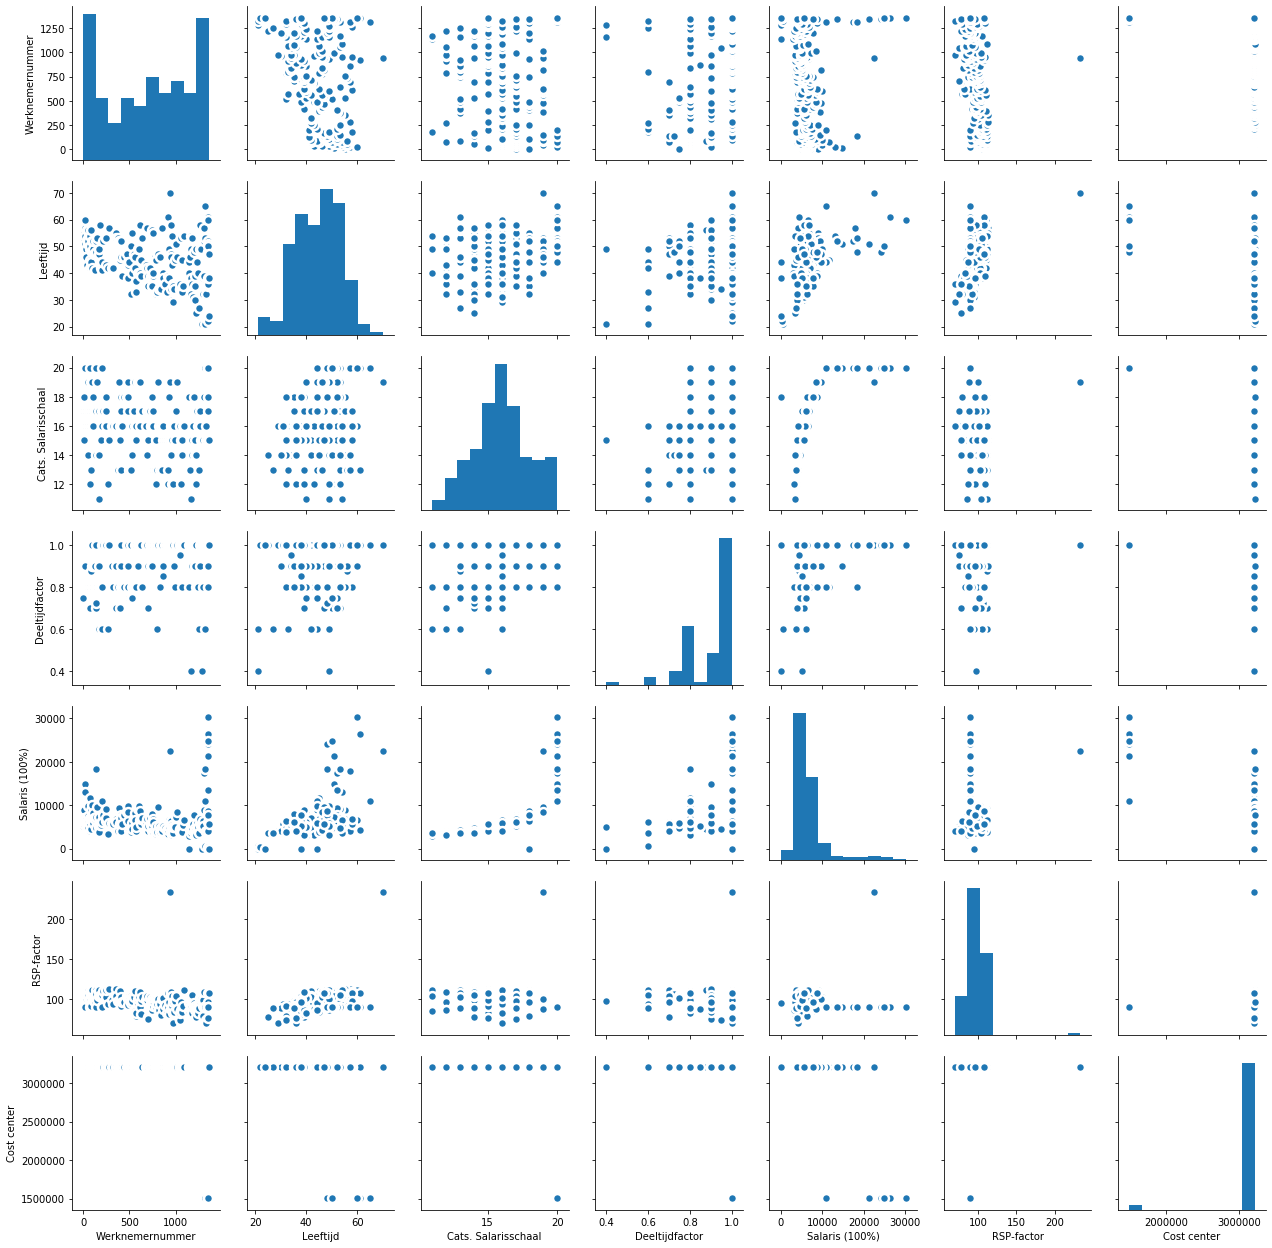

In [36]:
sns.pairplot(HR_Data, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5), kind='scatter')

Werknemernummer niet interessant.\
Leeftijd redelijke verspreiding. -> interessant om verder uit te zoeken.\
Salarisschaal categorie, lastig te zeggen want is een getal als index.\
Deeltijdfactor: veel mensen toch richting 100%, logisch ook meesten zijn 1 of 2 dagen vrij als je parttime werkt.\
Salaris: interessante, je ziet weinig uitschieters. Veel mensen verdienen ongeveer gelijk.\
RSP-factor, ook redelijk gelijk.\
Cost center niet interessant, behalve je ziet dat er weinig mensen in costcenter 150.. zitten en veel in 320.. . 150.. is andere company en zit alleen de board in.

In [37]:
Geslacht_Distr=np.unique(HR_Data.Geslacht, return_counts=True)

([<matplotlib.patches.Wedge at 0x22d6d0efc48>,
 [Text(-0.08989314733204933, -1.096320766045567, 'M'),
  Text(0.0898930446870911, 1.0963207744619659, 'V')],
 [Text(-0.04903262581748145, -0.5979931451157637, '47.4%'),
  Text(0.04903256982932241, 0.5979931497065268, '52.6%')])

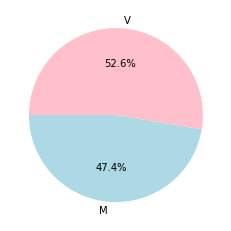

In [38]:
plt.pie(Geslacht_Distr[1], labels=np.unique(Geslacht_Distr[0], return_counts=False), autopct='%1.1f%%', shadow=False, startangle=180, colors =['lightblue', 'pink'])

In [39]:
leeftijd_bins = [18, 30, 40, 50, 60, 70, 120]
leeftijdsgroepen_unique = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
HR_Data['Leeftijdsgroep'] = pd.cut(HR_Data.Leeftijd, leeftijd_bins, labels = leeftijdsgroepen_unique,include_lowest = True)

In [40]:
HR_Data[['Leeftijd','Leeftijdsgroep']]

,Leeftijd,Leeftijdsgroep
0,52,50-59
1,55,50-59
2,51,50-59
3,52,50-59
4,49,40-49
...,...,...
187,60,50-59
188,22,18-29
189,47,40-49
190,38,30-39


In [41]:
Aantal_Totaal=[]
Aantal_M=[]
Aantal_V=[]

for i in range(len(leeftijdsgroepen_unique)):
    Aantal_Totaal.append(HR_Data.Leeftijdsgroep[HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i]].count())
    Aantal_M.append(HR_Data.Leeftijdsgroep[(HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())
    Aantal_V.append(HR_Data.Leeftijdsgroep[(HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())

In [42]:
Leeftijdsgroep_Data=[leeftijdsgroepen_unique,Aantal_Totaal,Aantal_M,Aantal_V]
Leeftijdsgroep_Data

[['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
 [9, 58, 70, 51, 4, 0],
 [3, 22, 28, 35, 3, 0],
 [6, 36, 42, 16, 1, 0]]

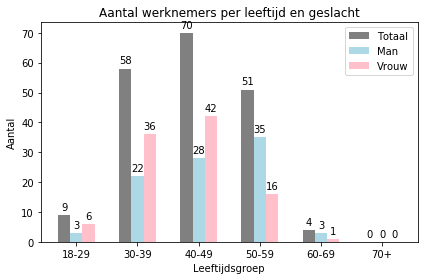

In [43]:
labels = Leeftijdsgroep_Data[0]
x = np.arange(len(labels))  # label locaties
width = 0.2
fig, ax = plt.subplots()
bar_T = ax.bar(x - width, Leeftijdsgroep_Data[1], width, label='Totaal',color="grey")
bar_M = ax.bar(x, Leeftijdsgroep_Data[2], width, label='Man',color="lightblue")
bar_V = ax.bar(x + width, Leeftijdsgroep_Data[3], width, label='Vrouw',color="pink")

#Legenda, titels
ax.set_title('Aantal werknemers per leeftijd en geslacht')
ax.legend()

ax.set_xlabel('Leeftijdsgroep')
ax.set_xticklabels(labels) # labels x-as
ax.set_xticks(x)
ax.set_ylabel('Aantal')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bar_T)
autolabel(bar_M)
autolabel(bar_V)

fig.tight_layout() #zorgt dat het goed past

plt.show()

Interessant: Werken tm leeftijdsgroep van 40-49 meer vrouwen in verhouding met mannen, maar boven 50 slaat dit significant om

In [44]:
Aantal_Board_Totaal=[]
Aantal_Board_M=[]
Aantal_Board_V=[]

for i in range(len(leeftijdsgroepen_unique)):
    Aantal_Board_Totaal.append(HR_Data.Leeftijdsgroep[(HR_Data.Functie=='Board') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())
    Aantal_Board_M.append(HR_Data.Leeftijdsgroep[(HR_Data.Functie=='Board') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())
    Aantal_Board_V.append(HR_Data.Leeftijdsgroep[(HR_Data.Functie=='Board') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())

In [45]:
Leeftijdsgroep_Board_Data=[leeftijdsgroepen_unique,Aantal_Board_Totaal,Aantal_Board_M,Aantal_Board_V]
Leeftijdsgroep_Board_Data

[['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
 [0, 0, 2, 2, 2, 0],
 [0, 0, 2, 2, 2, 0],
 [0, 0, 0, 0, 0, 0]]

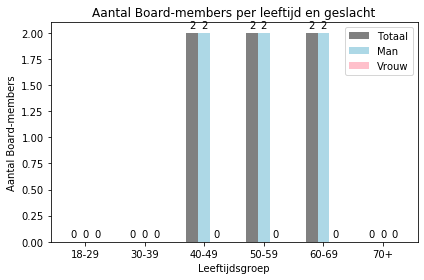

In [46]:
labels = Leeftijdsgroep_Data[0]
x = np.arange(len(labels))  # label locaties
width = 0.2
fig, ax = plt.subplots()
bar_T = ax.bar(x - width, Leeftijdsgroep_Board_Data[1], width, label='Totaal',color="grey")
bar_M = ax.bar(x, Leeftijdsgroep_Board_Data[2], width, label='Man',color="lightblue")
bar_V = ax.bar(x + width, Leeftijdsgroep_Board_Data[3], width, label='Vrouw',color="pink")

#Legenda, titels
ax.set_title('Aantal Board-members per leeftijd en geslacht')
ax.legend()

ax.set_xlabel('Leeftijdsgroep')
ax.set_xticklabels(labels) # labels x-as
ax.set_xticks(x)
ax.set_ylabel('Aantal Board-members')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bar_T)
autolabel(bar_M)
autolabel(bar_V)

fig.tight_layout() #zorgt dat het goed past

plt.show()

Board bestaat alleen maar uit mannen, jongste in leeftijdsgroep 40-49 jaar, oudste in leeftijd 60-69 jaar.

In [47]:
HR_Data.Leeftijd[(HR_Data.Functie=='Board')].min()

48

In [48]:
HR_Data.Leeftijd[(HR_Data.Functie=='Board')].max()

65

Leeftijdsrange van de Board is 48-65 jaar.

In [49]:
Avg_Salaris_Totaal=[]
Avg_Salaris_M=[]
Avg_Salaris_V=[]

for i in range(len(leeftijdsgroepen_unique)):
    Avg_Salaris_Totaal.append(round(HR_Data[HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i]]['Salaris (100%)'].mean(),0))
    Avg_Salaris_M.append(round(HR_Data[(HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    Avg_Salaris_V.append(round(HR_Data[(HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

In [50]:
Leeftijdsgroep_Avg_Salaris_Data=[leeftijdsgroepen_unique,Avg_Salaris_Totaal,Avg_Salaris_M,Avg_Salaris_V]
Leeftijdsgroep_Avg_Salaris_Data

[['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
 [2425.0, 5025.0, 6986.0, 8188.0, 16052.0, nan],
 [4370.0, 5446.0, 7981.0, 9100.0, 19948.0, nan],
 [1452.0, 4768.0, 6322.0, 6192.0, 4364.0, nan]]

posx and posy should be finite values
posx and posy should be finite values


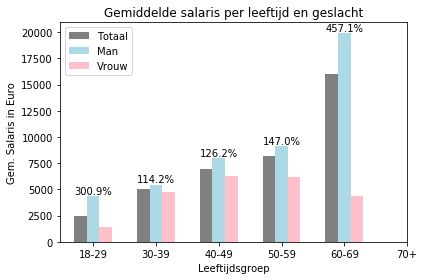

In [51]:
labels = Leeftijdsgroep_Data[0]
x = np.arange(len(labels))  # label locaties
width = 0.2
fig, ax = plt.subplots()
bar_T = ax.bar(x - width, Leeftijdsgroep_Avg_Salaris_Data[1], width, label='Totaal',color="grey")
bar_M = ax.bar(x, Leeftijdsgroep_Avg_Salaris_Data[2], width, label='Man',color="lightblue")
bar_V = ax.bar(x + width, Leeftijdsgroep_Avg_Salaris_Data[3], width, label='Vrouw',color="pink")

#Legenda, titels
ax.set_title('Gemiddelde salaris per leeftijd en geslacht')
ax.legend()

ax.set_xlabel('Leeftijdsgroep')
ax.set_xticklabels(labels) # labels x-as
ax.set_xticks(x)
ax.set_ylabel('Gem. Salaris in Euro')

difference_perc = []
for i in range(len(leeftijdsgroepen_unique)):
    difference_perc.append((HR_Data[(HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean())/(HR_Data[(HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean()))
    if math.isnan(difference_perc[i]):
        difference_perc[i]=0
    else: 
        difference_perc[i]='{:.1f}%'.format(100.*difference_perc[i])

pairs = len(Leeftijdsgroep_Avg_Salaris_Data[0])
make_pairs = zip(*[ax.get_children()[:pairs],ax.get_children()[pairs:pairs*2]])
 
for i,(left, right) in enumerate(make_pairs):
 ax.text(i,max(left.get_bbox().y1,right.get_bbox().y1)+200,difference_perc[i], horizontalalignment ='center') 
#%-text in het midden van de bars

fig.tight_layout() #zorgt dat het goed past

plt.show()



Percentage laat zien hoeveel mannen meer verdienen dan vrouwen gemiddeld gezien. We hebben al eerder gezien dat er alleen mannen in de Board zitten, hogere functie is logischerwijs hoger salaris. Maar deze Board members zijn 48+ en in andere leeftijdsgroepen verdienen mannen ook meer dan vrouwen.

Bekijken per (hoofd)afdeling

In [52]:
Aantal_Afdeling_Totaal=[]
Aantal_Afdeling_M=[]
Aantal_Afdeling_V=[]

for i in range(len(leeftijdsgroepen_unique)):
    Aantal_Totaal.append(HR_Data.Leeftijdsgroep[HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i]].count())
    Aantal_M.append(HR_Data.Leeftijdsgroep[(HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())
    Aantal_V.append(HR_Data.Leeftijdsgroep[(HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())

In [53]:
Leeftijdsgroep_Data=[leeftijdsgroepen_unique,Aantal_Totaal,Aantal_M,Aantal_V]
Leeftijdsgroep_Data

[['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
 [9, 58, 70, 51, 4, 0, 9, 58, 70, 51, 4, 0],
 [3, 22, 28, 35, 3, 0, 3, 22, 28, 35, 3, 0],
 [6, 36, 42, 16, 1, 0, 6, 36, 42, 16, 1, 0]]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

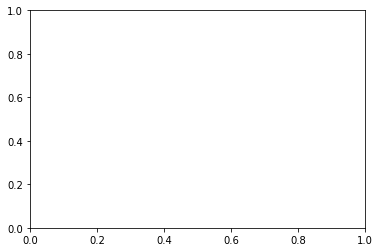

In [54]:
labels = Leeftijdsgroep_Data[0]
x = np.arange(len(labels))  # label locaties
width = 0.2
fig, ax = plt.subplots()
bar_T = ax.bar(x - width, Leeftijdsgroep_Data[1], width, label='Totaal',color="grey")
bar_M = ax.bar(x, Leeftijdsgroep_Data[2], width, label='Man',color="lightblue")
bar_V = ax.bar(x + width, Leeftijdsgroep_Data[3], width, label='Vrouw',color="pink")

#Legenda, titels
ax.set_title('Aantal werknemers per leeftijd en geslacht')
ax.legend()

ax.set_xlabel('Leeftijdsgroep')
ax.set_xticklabels(labels) # labels x-as
ax.set_xticks(x)
ax.set_ylabel('Aantal')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bar_T)
autolabel(bar_M)
autolabel(bar_V)

fig.tight_layout() #zorgt dat het goed past

plt.show()

In [55]:
HA = HR_Data.groupby(['Hoofdafdeling'])['Salaris (100%)'].mean()
labels_HA = HA.index
ax1.bar(labels_HA,HA,color="grey")

#Legenda, titels
ax1.set_title('Salaris per Hoofdafdeling')

ax1.set_xlabel('Hoofdafdeling')
ax1.set_ylabel('Gem. Salaris (euro)')

plt.show()


NameError: name 'ax1' is not defined

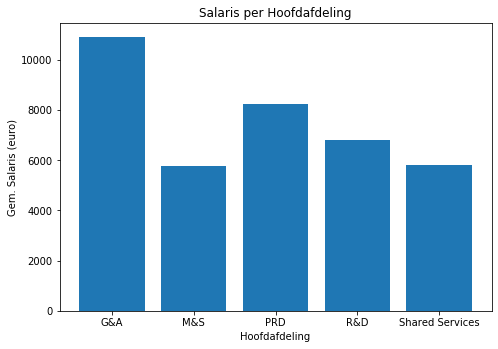

In [56]:
#not finished
HA_M = HR_Data.groupby(['Hoofdafdeling']['Geslacht'=='M'])['Salaris (100%)'].mean()
HA_V = HR_Data.groupby(['Hoofdafdeling']['Geslacht'=='V'])['Salaris (100%)'].mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels_HA = HA.index
bar=ax.bar(labels_HA,HA)

#Legenda, titels
ax.set_title('Salaris per Hoofdafdeling')

ax.set_xlabel('Hoofdafdeling')
ax.set_ylabel('Gem. Salaris (euro)')

plt.show()


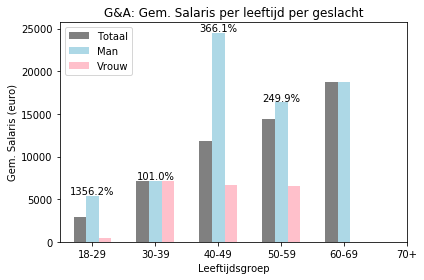

In [57]:
GA_Avg_Salaris_Totaal=[]
GA_Avg_Salaris_M=[]
GA_Avg_Salaris_V=[]

GA_Avg_Salaris_Data=[leeftijdsgroepen_unique,GA_Avg_Salaris_Totaal,GA_Avg_Salaris_M,GA_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    GA_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='G&A') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    GA_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='G&A') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    GA_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='G&A') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

labels = GA_Avg_Salaris_Data[0]
x = np.arange(len(labels))  # label locaties
width = 0.2
fig, ax = plt.subplots()
bar_T = ax.bar(x - width, GA_Avg_Salaris_Data[1], width, label='Totaal',color="grey")
bar_M = ax.bar(x, GA_Avg_Salaris_Data[2], width, label='Man',color="lightblue")
bar_V = ax.bar(x + width, GA_Avg_Salaris_Data[3], width, label='Vrouw',color="pink")

#Legenda, titels
ax.set_title('G&A: Gem. Salaris per leeftijd per geslacht')
ax.legend()

ax.set_xlabel('Leeftijdsgroep')
ax.set_xticklabels(labels) # labels x-as
ax.set_xticks(x)
ax.set_ylabel('Gem. Salaris (euro)')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

difference_perc = []
for i in range(len(leeftijdsgroepen_unique)):
    difference_perc.append((GA_Avg_Salaris_Data[2][i])/(GA_Avg_Salaris_Data[3][i]))
    if math.isnan(difference_perc[i]):
        difference_perc[i]=""
    else: 
        difference_perc[i]='{:.1f}%'.format(100.*difference_perc[i])

pairs = len(GA_Avg_Salaris_Data[0])
make_pairs = zip(*[ax.get_children()[:pairs],ax.get_children()[pairs:pairs*2]])
 
for i,(left, right) in enumerate(make_pairs):
 ax.text(i,max(left.get_bbox().y1,right.get_bbox().y1)+200,difference_perc[i], horizontalalignment ='center') 
#%-text in het midden van de bars
        
        

fig.tight_layout() #zorgt dat het goed past

plt.show()

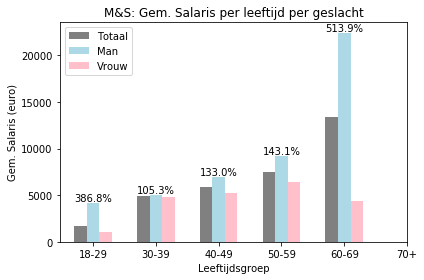

In [58]:
MS_Avg_Salaris_Totaal=[]
MS_Avg_Salaris_M=[]
MS_Avg_Salaris_V=[]

MS_Avg_Salaris_Data=[leeftijdsgroepen_unique,MS_Avg_Salaris_Totaal,MS_Avg_Salaris_M,MS_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    MS_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='M&S') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    MS_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='M&S') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    MS_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='M&S') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

labels = MS_Avg_Salaris_Data[0]
x = np.arange(len(labels))  # label locaties
width = 0.2
fig, ax = plt.subplots()
bar_T = ax.bar(x - width, MS_Avg_Salaris_Data[1], width, label='Totaal',color="grey")
bar_M = ax.bar(x, MS_Avg_Salaris_Data[2], width, label='Man',color="lightblue")
bar_V = ax.bar(x + width, MS_Avg_Salaris_Data[3], width, label='Vrouw',color="pink")

#Legenda, titels
ax.set_title('M&S: Gem. Salaris per leeftijd per geslacht')
ax.legend()

ax.set_xlabel('Leeftijdsgroep')
ax.set_xticklabels(labels) # labels x-as
ax.set_xticks(x)
ax.set_ylabel('Gem. Salaris (euro)')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

difference_perc = []
for i in range(len(leeftijdsgroepen_unique)):
    difference_perc.append((MS_Avg_Salaris_Data[2][i])/(MS_Avg_Salaris_Data[3][i]))
    if math.isnan(difference_perc[i]):
        difference_perc[i]=""
    else: 
        difference_perc[i]='{:.1f}%'.format(100.*difference_perc[i])

pairs = len(MS_Avg_Salaris_Data[0])
make_pairs = zip(*[ax.get_children()[:pairs],ax.get_children()[pairs:pairs*2]])
 
for i,(left, right) in enumerate(make_pairs):
 ax.text(i,max(left.get_bbox().y1,right.get_bbox().y1)+200,difference_perc[i], horizontalalignment ='center') 
#%-text in het midden van de bars
        
        

fig.tight_layout() #zorgt dat het goed past

plt.show()

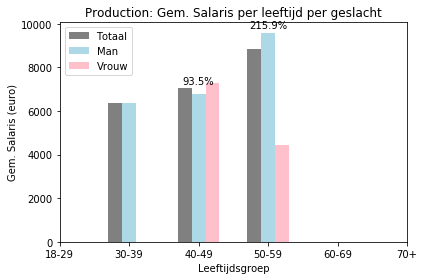

In [59]:
PRD_Avg_Salaris_Totaal=[]
PRD_Avg_Salaris_M=[]
PRD_Avg_Salaris_V=[]

PRD_Avg_Salaris_Data=[leeftijdsgroepen_unique,PRD_Avg_Salaris_Totaal,PRD_Avg_Salaris_M,PRD_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    PRD_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='PRD') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    PRD_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='PRD') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    PRD_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='PRD') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

labels = PRD_Avg_Salaris_Data[0]
x = np.arange(len(labels))  # label locaties
width = 0.2
fig, ax = plt.subplots()
bar_T = ax.bar(x - width, PRD_Avg_Salaris_Data[1], width, label='Totaal',color="grey")
bar_M = ax.bar(x, PRD_Avg_Salaris_Data[2], width, label='Man',color="lightblue")
bar_V = ax.bar(x + width, PRD_Avg_Salaris_Data[3], width, label='Vrouw',color="pink")

#Legenda, titels
ax.set_title('Production: Gem. Salaris per leeftijd per geslacht')
ax.legend()

ax.set_xlabel('Leeftijdsgroep')
ax.set_xticklabels(labels) # labels x-as
ax.set_xticks(x)
ax.set_ylabel('Gem. Salaris (euro)')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

difference_perc = []
for i in range(len(leeftijdsgroepen_unique)):
    difference_perc.append((PRD_Avg_Salaris_Data[2][i])/(PRD_Avg_Salaris_Data[3][i]))
    if math.isnan(difference_perc[i]):
        difference_perc[i]=""
    else: 
        difference_perc[i]='{:.1f}%'.format(100.*difference_perc[i])

pairs = len(PRD_Avg_Salaris_Data[0])
make_pairs = zip(*[ax.get_children()[:pairs],ax.get_children()[pairs:pairs*2]])
 
for i,(left, right) in enumerate(make_pairs):
 ax.text(i,max(left.get_bbox().y1,right.get_bbox().y1)+200,difference_perc[i], horizontalalignment ='center') 
#%-text in het midden van de bars
        
        

fig.tight_layout() #zorgt dat het goed past

plt.show()

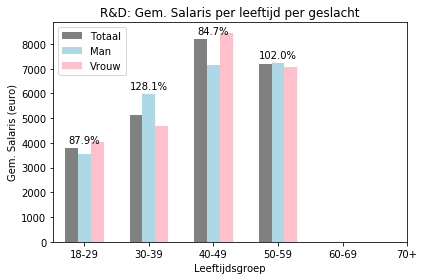

In [60]:
RD_Avg_Salaris_Totaal=[]
RD_Avg_Salaris_M=[]
RD_Avg_Salaris_V=[]

RD_Avg_Salaris_Data=[leeftijdsgroepen_unique,RD_Avg_Salaris_Totaal,RD_Avg_Salaris_M,RD_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    RD_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='R&D') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    RD_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='R&D') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    RD_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='R&D') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

labels = RD_Avg_Salaris_Data[0]
x = np.arange(len(labels))  # label locaties
width = 0.2
fig, ax = plt.subplots()
bar_T = ax.bar(x - width, RD_Avg_Salaris_Data[1], width, label='Totaal',color="grey")
bar_M = ax.bar(x, RD_Avg_Salaris_Data[2], width, label='Man',color="lightblue")
bar_V = ax.bar(x + width, RD_Avg_Salaris_Data[3], width, label='Vrouw',color="pink")

#Legenda, titels
ax.set_title('R&D: Gem. Salaris per leeftijd per geslacht')
ax.legend()

ax.set_xlabel('Leeftijdsgroep')
ax.set_xticklabels(labels) # labels x-as
ax.set_xticks(x)
ax.set_ylabel('Gem. Salaris (euro)')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

difference_perc = []
for i in range(len(leeftijdsgroepen_unique)):
    difference_perc.append((RD_Avg_Salaris_Data[2][i])/(RD_Avg_Salaris_Data[3][i]))
    if math.isnan(difference_perc[i]):
        difference_perc[i]=""
    else: 
        difference_perc[i]='{:.1f}%'.format(100.*difference_perc[i])

pairs = len(RD_Avg_Salaris_Data[0])
make_pairs = zip(*[ax.get_children()[:pairs],ax.get_children()[pairs:pairs*2]])
 
for i,(left, right) in enumerate(make_pairs):
 ax.text(i,max(left.get_bbox().y1,right.get_bbox().y1)+200,difference_perc[i], horizontalalignment ='center') 
#%-text in het midden van de bars
        
        

fig.tight_layout() #zorgt dat het goed past

plt.show()

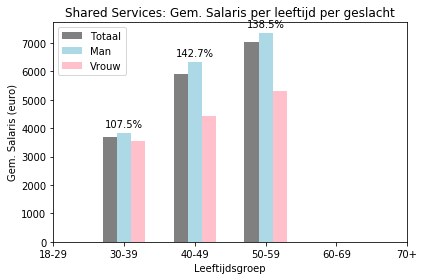

In [61]:
SS_Avg_Salaris_Totaal=[]
SS_Avg_Salaris_M=[]
SS_Avg_Salaris_V=[]

SS_Avg_Salaris_Data=[leeftijdsgroepen_unique,SS_Avg_Salaris_Totaal,SS_Avg_Salaris_M,SS_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    SS_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='Shared Services') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    SS_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='Shared Services') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    SS_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='Shared Services') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

labels = SS_Avg_Salaris_Data[0]
x = np.arange(len(labels))  # label locaties
width = 0.2
fig, ax = plt.subplots()
bar_T = ax.bar(x - width, SS_Avg_Salaris_Data[1], width, label='Totaal',color="grey")
bar_M = ax.bar(x, SS_Avg_Salaris_Data[2], width, label='Man',color="lightblue")
bar_V = ax.bar(x + width, SS_Avg_Salaris_Data[3], width, label='Vrouw',color="pink")

#Legenda, titels
ax.set_title('Shared Services: Gem. Salaris per leeftijd per geslacht')
ax.legend()

ax.set_xlabel('Leeftijdsgroep')
ax.set_xticklabels(labels) # labels x-as
ax.set_xticks(x)
ax.set_ylabel('Gem. Salaris (euro)')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

difference_perc = []
for i in range(len(leeftijdsgroepen_unique)):
    difference_perc.append((SS_Avg_Salaris_Data[2][i])/(SS_Avg_Salaris_Data[3][i]))
    if math.isnan(difference_perc[i]):
        difference_perc[i]=""
    else: 
        difference_perc[i]='{:.1f}%'.format(100.*difference_perc[i])

pairs = len(SS_Avg_Salaris_Data[0])
make_pairs = zip(*[ax.get_children()[:pairs],ax.get_children()[pairs:pairs*2]])
 
for i,(left, right) in enumerate(make_pairs):
 ax.text(i,max(left.get_bbox().y1,right.get_bbox().y1)+200,difference_perc[i], horizontalalignment ='center') 
#%-text in het midden van de bars
        
        

fig.tight_layout() #zorgt dat het goed past

plt.show()

Dashboardje van maken, functie/definitie schrijven want ik herhaal code steeds -> inefficient

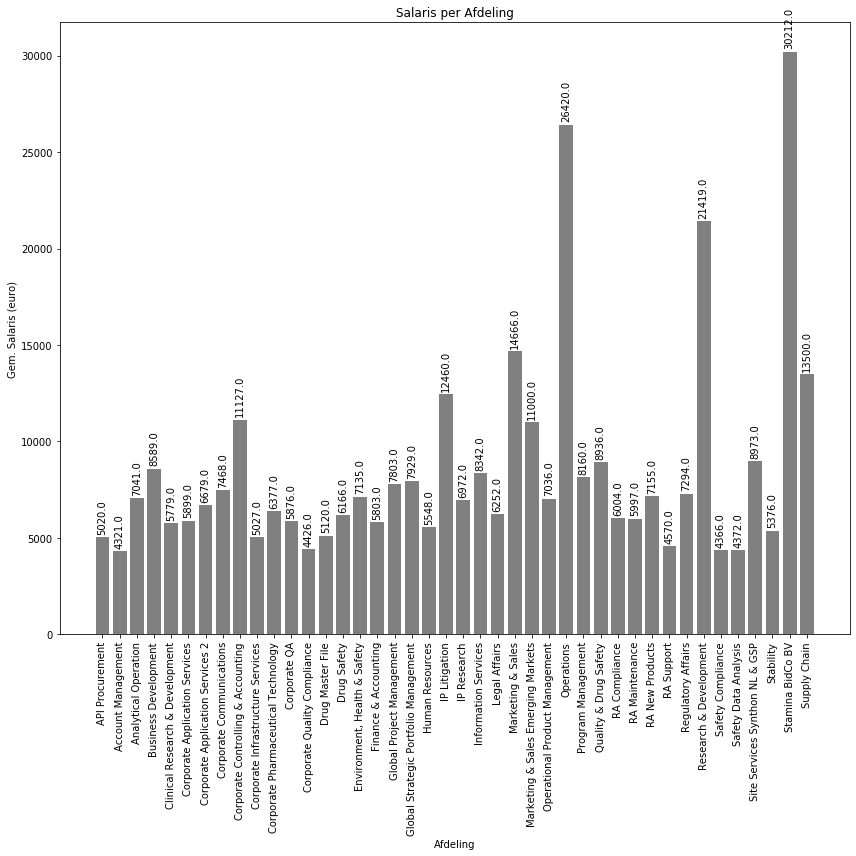

In [62]:
Afdeling = round(HR_Data.groupby(['Afdeling'])['Salaris (100%)'].mean(),0)
labels_Afdeling = Afdeling.index
fig, ax = plt.subplots(figsize=(12,12))
bar=ax.bar(labels_Afdeling,Afdeling,color="grey")

#Legenda, titels
ax.set_title('Salaris per Afdeling')
ax.set_xlabel('Afdeling')
plt.xticks(rotation=90)
ax.set_ylabel('Gem. Salaris (euro)')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=90)


autolabel(bar)

fig.tight_layout() #zorgt dat het goed past

plt.show()


Ideetje om misschien uit te werken, stagaires eruit en uitzendkrachten doordat zij weinig salaris hebben, niet representatief.\
Functiegroep uitzoeken